# 事件研究法

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [220]:
sns.set_palette("Set2")
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [221]:
events = ['2021-03-24']

In [234]:
p1 = "不含比特币的加密货币市值.xlsx"
p2 = "BTC-USD.xlsx"

In [235]:
df_index = pd.read_excel(p1)
df = pd.read_excel(p2)

In [236]:
df_index = df_index[['Date', 'pct_chg']].copy()
df_index.columns = ['trade_date', '数字货币市场收益率']

In [237]:
df = df[['Date', '收益率']].copy()
df.columns = ['trade_date', '比特币收益率']

In [238]:
df_final = df.merge(df_index, on='trade_date', how='left')
df_final = df_final.dropna()
df_final = df_final.reset_index().drop("index", axis=1)

In [239]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trade_date  197 non-null    datetime64[ns]
 1   比特币收益率      197 non-null    float64       
 2   数字货币市场收益率   197 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.7 KB


In [240]:
df_final

,trade_date,比特币收益率,数字货币市场收益率
0,2020-12-02,-0.013501,-0.005496
1,2020-12-03,0.021956,0.022142
2,2020-12-04,-0.007389,-0.023353
3,2020-12-05,-0.012058,-0.019963
4,2020-12-06,0.014144,0.024651
...,...,...,...
192,2021-06-12,-0.020798,-0.025634
193,2021-06-13,0.028019,0.027689
194,2021-06-14,0.072129,0.043749
195,2021-06-15,0.014556,0.010420


In [241]:
def get_data(event,i,j):
    """
    i为事件窗的范围
    j为估计窗的范围
    """
    print("事件日为: ", event)
    results = np.zeros((len(i),len(j)))
    for a in range(len(i)):
        q, h = df_final[df_final['trade_date'] == event].index[0] - i[a], df_final[df_final['trade_date'] == event].index[0] + i[a]
        for b in range(len(j)):
            estimate_df = df_final.loc[q-j[b]:q]
            X = estimate_df[['数字货币市场收益率']]
            y = estimate_df['比特币收益率']
            linear_m = LinearRegression().fit(X, y)
            r_2 = linear_m.score(X, y)
            results[a][b]=r_2
    return results

In [242]:
shijian = np.arange(2,11,1)
guji = np.arange(10,90,5)

In [243]:
df  = get_data(event=events[0],i=shijian,j=guji)

事件日为:  2021-03-24


In [244]:
df.mean()

0.638311764805072

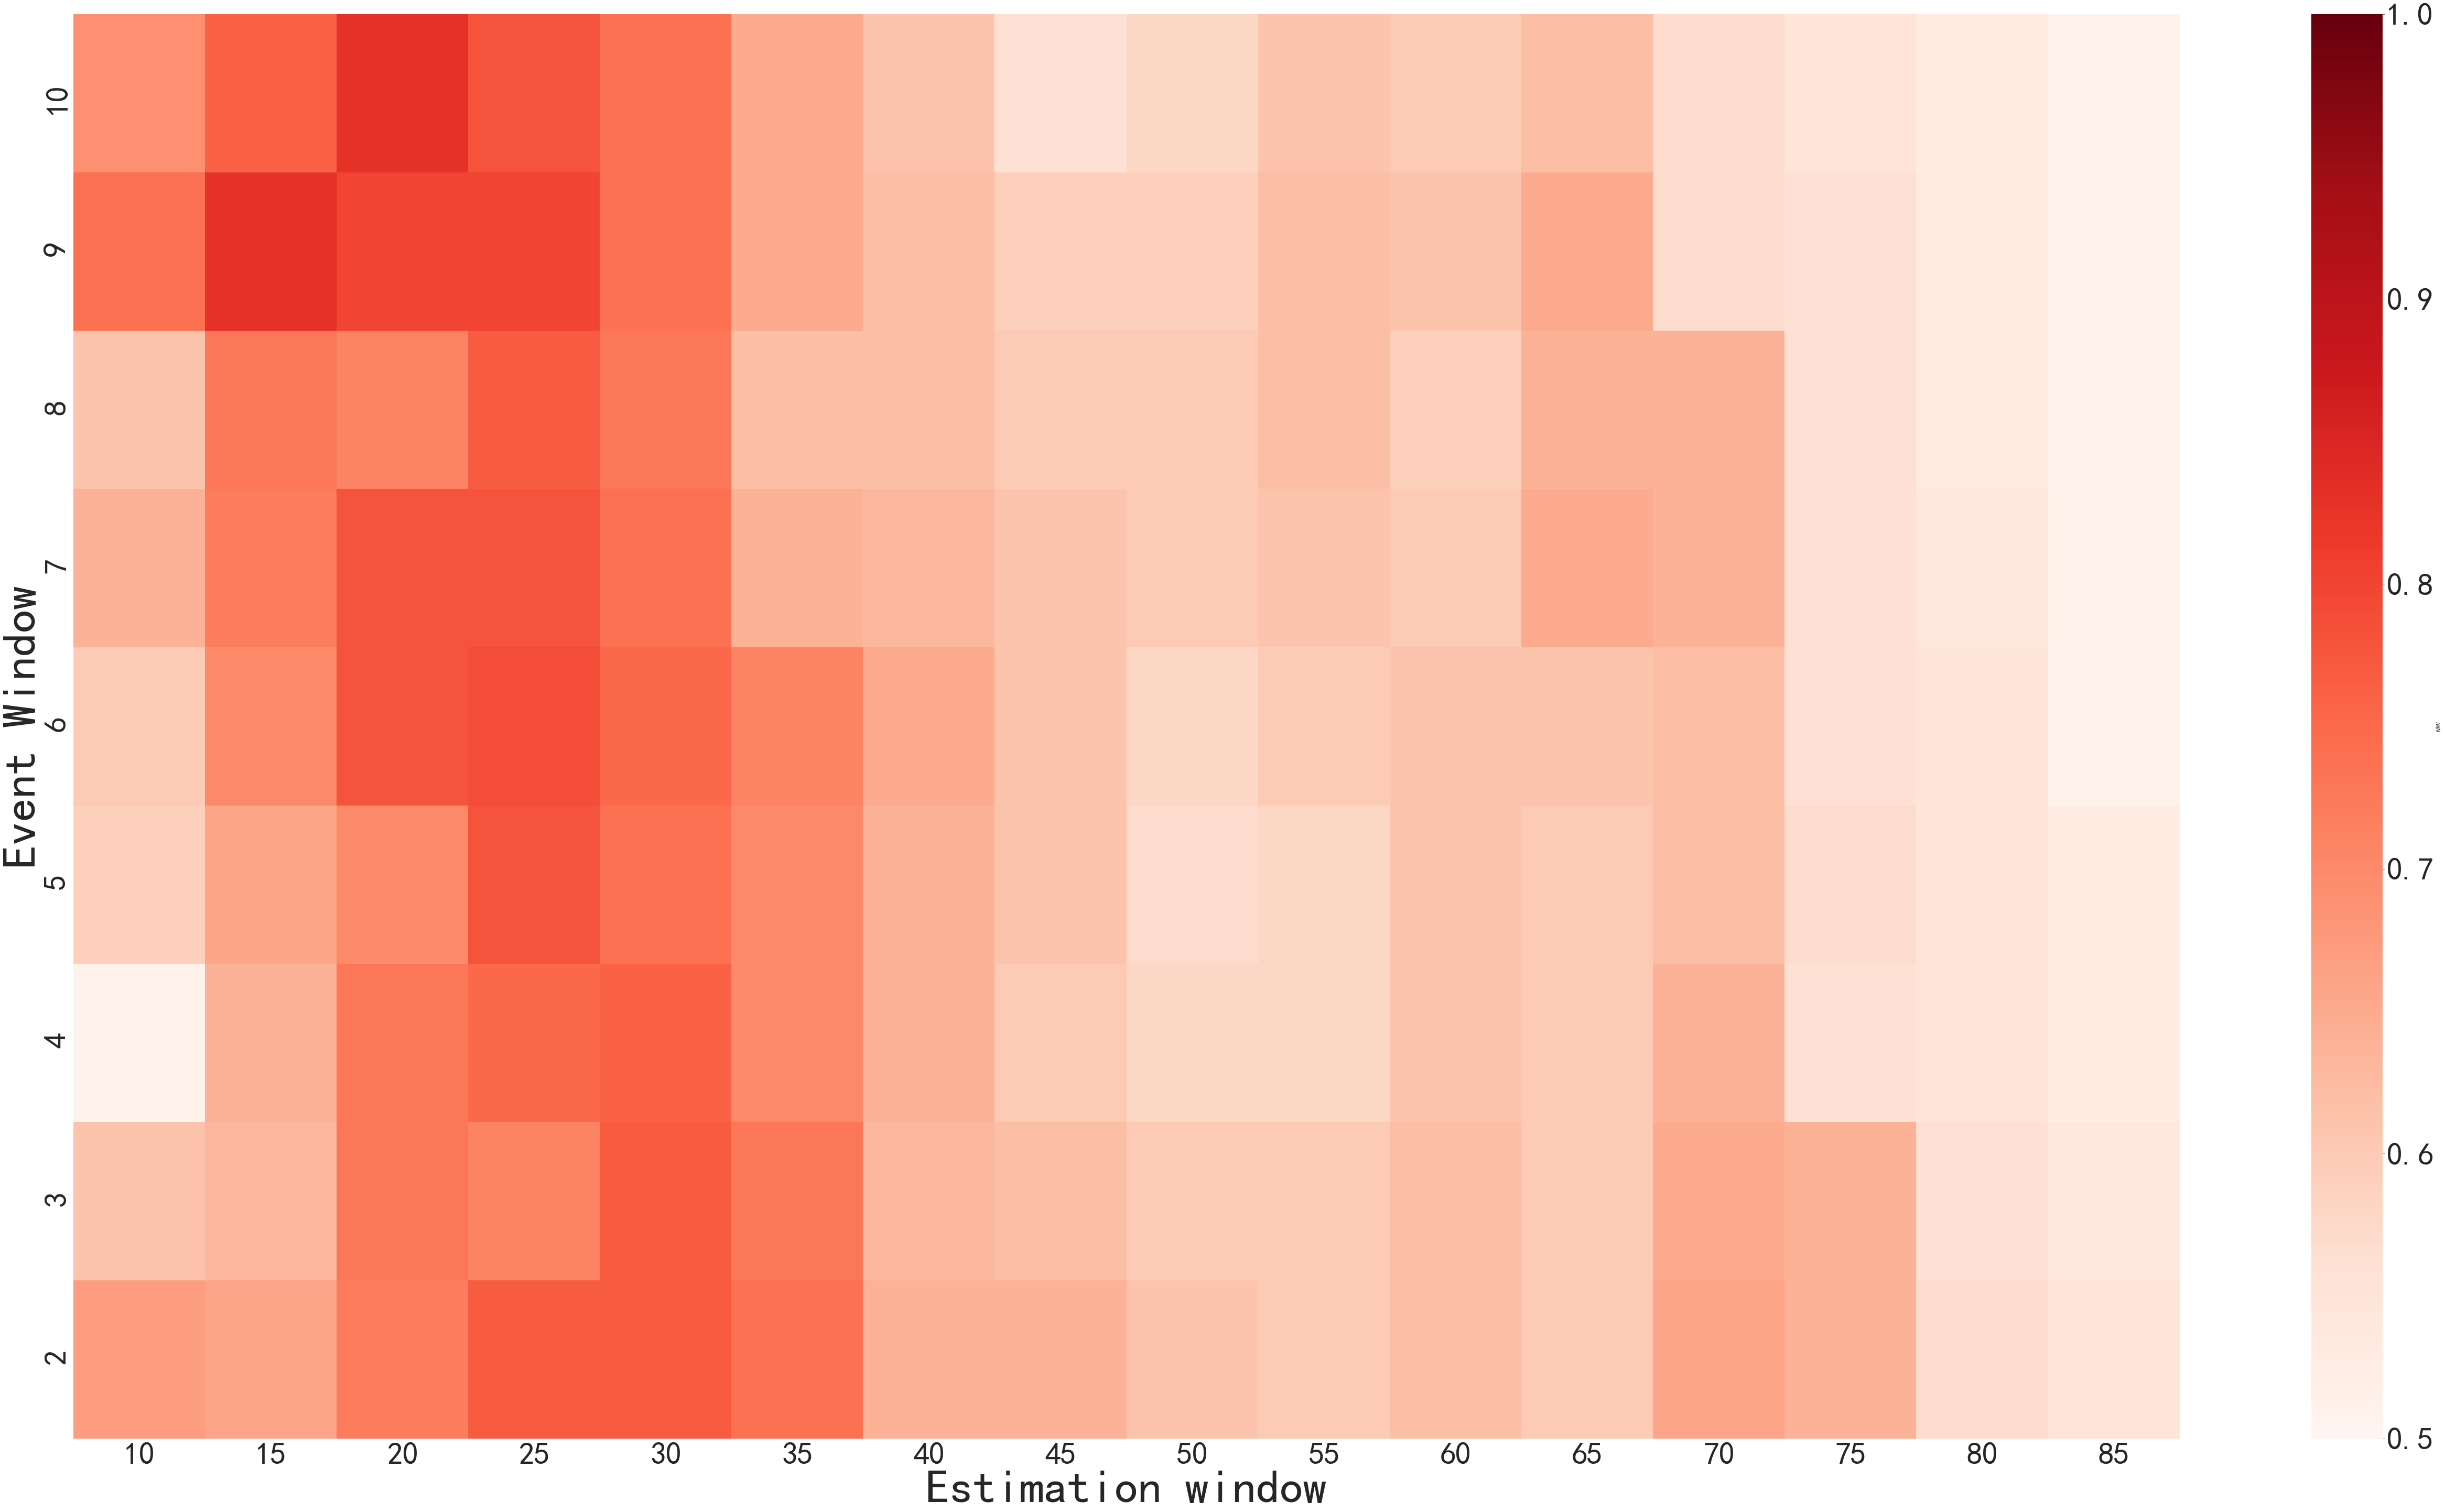

In [245]:
fig, ax = plt.subplots(figsize = (90,50))
#二维的数组的热力图，横轴和数轴的ticklabels要加上去的话，既可以通过将array转换成有column
#和index的DataFrame直接绘图生成，也可以后续再加上去。后面加上去的话，更灵活，包括可设置labels大小方向等。
sns.heatmap(pd.DataFrame(np.round(df,2), columns = guji, index = shijian),
                annot=False,vmax=1,vmin = 0.5, xticklabels= True, yticklabels= True, square=False, cmap="Reds").invert_yaxis()
#倒叙y轴

#ax.set_title('二维数组热力图', fontsize = 100)
#设置colorbar的刻度字体大小
cax = plt.gcf().axes[-1] 
cax.tick_params(labelsize=60)
#设置colorbar的label文本和字体大小
cbar = ax.collections[0].colorbar
cbar.set_label(r'$NMI$')
#设置时间窗标注字体大小
ax.tick_params(labelsize=60)
ax.set_ylabel('Event Window', fontsize = 90)
ax.set_xlabel('Estimation window', fontsize = 90) 
plt.savefig('./out.png')
plt.show()
